In [1]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()


Saving content.jpg.jpeg to content.jpg.jpeg


Saving style.jpg.jpg to style.jpg.jpg


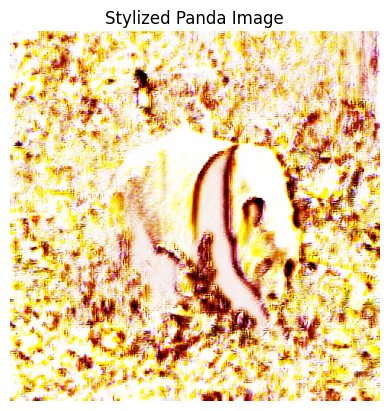

✅ Stylized image saved as stylized_panda.jpg


In [2]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load image function
def load_img(path):
    max_dim = 512
    img = Image.open(path).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = tf.keras.utils.img_to_array(img)
    img = tf.convert_to_tensor(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

# Load content and style images
content_image = load_img("content.jpg.jpeg")
style_image = load_img("style.jpg.jpg")

# Load TensorFlow Hub style transfer model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize the image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor.numpy()
    return Image.fromarray(tensor[0])

# Save and show output
output_img = tensor_to_image(stylized_image)
output_img.save("stylized_panda.jpg")
plt.imshow(output_img)
plt.axis("off")
plt.title("Stylized Panda Image")
plt.show()

print("✅ Stylized image saved as stylized_panda.jpg")
